In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
df = pd.read_csv("location_rev.csv")
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


<IPython.core.display.Javascript object>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   revenue              1000 non-null   float64
 1   num_competitors      1000 non-null   float64
 2   median_income        1000 non-null   float64
 3   num_loyalty_members  1000 non-null   float64
 4   population_density   1000 non-null   float64
 5   location_age         1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


<IPython.core.display.Javascript object>

In [6]:
df.describe()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38433.469330,3.397000,31360.668500,1597.200000,3351.199000,11.041000
std,11665.825242,1.016082,3943.278358,496.874663,975.664263,3.034885
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30277.897500,3.000000,28792.592500,1253.000000,2689.250000,9.000000
50%,38323.095000,3.000000,31134.555000,1605.000000,3353.000000,11.000000
75%,45894.670000,4.000000,34050.992500,1925.250000,4017.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


<IPython.core.display.Javascript object>

In [14]:
df["revenue"].isna().sum()

0

<IPython.core.display.Javascript object>

## Xác định các biến và yêu cầu

In [ ]:
'''

'''

# Simple Linear Regression

### Xem mối tương quan giữa các biến

In [19]:
df.corr()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
revenue,1.000000,-0.156685,0.601888,0.173432,0.311653,0.552773
num_competitors,-0.156685,1.000000,-0.018398,-0.027283,0.035768,0.053796
median_income,0.601888,-0.018398,1.000000,0.011891,-0.041697,0.045621
num_loyalty_members,0.173432,-0.027283,0.011891,1.000000,-0.028611,0.036016
population_density,0.311653,0.035768,-0.041697,-0.028611,1.000000,-0.009977
location_age,0.552773,0.053796,0.045621,0.036016,-0.009977,1.000000


<IPython.core.display.Javascript object>

### Features Selection

In [25]:
"""
=> vì biến target là revenue
=> chọn median_income là predict do corr(median_income, revenue) cao nhất ~~ 0.6 (tương quan mạnh)
"""

'\n=> vì biến target là revenue\n=> chọn median_income là predict do corr(median_income, revenue) cao nhất ~~ 0.6 (tương quan mạnh)\n'

<IPython.core.display.Javascript object>

### Kiểm tra model linear xem có phù hợp để dự đoán revenue đựa vào median_income hay ko

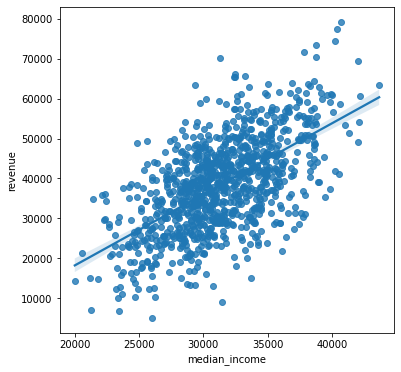

<IPython.core.display.Javascript object>

In [24]:
# x là biến prdict, y là target
plt.figure(figsize=(6, 6))
sns.regplot(data=df, x="median_income", y="revenue")
plt.show()

In [27]:
"""
=> các điểm data khá bám sát theo đường thẳng regression line
"""

'\n=> các điểm data khá bám sát theo đường thẳng regression line\n'

<IPython.core.display.Javascript object>

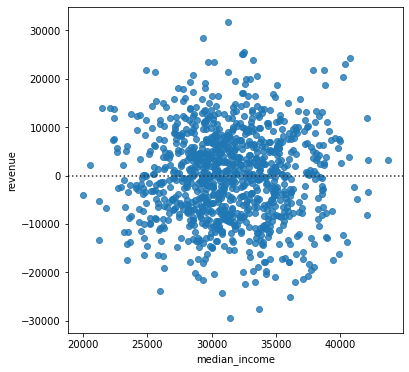

<IPython.core.display.Javascript object>

In [26]:
# biểu đồ phần dư
plt.figure(figsize=(6, 6))
sns.residplot(data=df, x="median_income", y="revenue")
plt.show()

In [28]:
"""
=> các điểm data nằm ngẫu nhiên trên trục (ko phải chỉ nằm hoàn toàn trên trục 0 hoặc nằm dưới trục 0 ho)
"""

'\n=> các điểm data nằm ngẫu nhiên trên trục (ko phải chỉ nằm hoàn toàn trên trục 0 hoặc nằm dưới trục 0 ho)\n'

<IPython.core.display.Javascript object>

In [29]:
"""
=> mô hình hồi quy có thể sử dụng để dự đoán revenue
"""

'\n=> mô hình hồi quy có thể sử dụng để dự đoán revenue\n'

<IPython.core.display.Javascript object>

## Xây đựng model

### B1. Lựa chọn thuật toán

In [10]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

### B2. chuẩn bị tập X và y

In [33]:
X = df[["median_income"]]
y = df.revenue

<IPython.core.display.Javascript object>

### B3. Tách dataset ra làm tập train và test 

In [11]:
# sử dụng train_test_split
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [36]:
# ko truyền train - test size thì mặc định là 75-25

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)  # test với tỉ lệ 80/20: 80 train, 20 test
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

<IPython.core.display.Javascript object>

In [45]:
# muốn bộ train, test ko thay đổi => dùng random_state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12  # nhảy 12 vị trí
)

<IPython.core.display.Javascript object>

In [46]:
X_train[:5]

,median_income
56,26393.34
955,33489.39
231,39126.47
738,40066.88
740,35448.85


<IPython.core.display.Javascript object>

### B4. Huấn luyện model với tập train

In [48]:
# Khởi tạo model LinearRegression
model = LinearRegression()

<IPython.core.display.Javascript object>

In [49]:
# cho model học (fit)
model.fit(X_train, y_train)


LinearRegression()

<IPython.core.display.Javascript object>

### B5. Kiểm tra model với data test

In [50]:
yhat_test = model.predict(X_test)

<IPython.core.display.Javascript object>

In [54]:
# Y = B0 + B1X
B0 = model.intercept_
B1 = model.coef_[0]

<IPython.core.display.Javascript object>

In [60]:
print("Y = ", B0, " + ", B1, "X")
print("\n Với: Y: revenue")
print("      X: median_income")

Y =  -16939.310958008922  +  1.769111648107495 X

 Với: Y: revenue
      X: median_income


<IPython.core.display.Javascript object>

In [56]:
"""

Ứng với các bộ train - test khác nhau thì B0 và B1 cũng khác nhau
=> muốn ko đổi thì phải cố định train - test dataset
"""

'\nỨng với các bộ train - test khác nhau thì B0 và B1 cũng khác nhau\n=> muốn ko đổi thì phải cố định train - test dataset\n'

<IPython.core.display.Javascript object>

### B6. Đánh giá model

In [61]:
print("R-squared train dataset", model.score(X_train, y_train))
print("R-squared test dataset", model.score(X_test, y_test))

R-squared train dataset 0.3594855146050385
R-squared test dataset 0.3723478516096116


<IPython.core.display.Javascript object>

In [64]:
"""
vì R-squared cả train và test đều thấp (theo tui, cao là khoảng 80% - tùy trường hợp nhaaa)
Có thể chạy lại 1 bộ train-test khác để thử xem hiệu quả có cao hơn ko (cũng ko hơn là bao nhiêu đâu:))

"""

'\nvì R-squared cả train và test đều thấp (theo tui, cao là khoảng 80% - tùy trường hợp nhaaa)\nCó thể chạy lại 1 bộ train-test khác để thử xem hiệu quả có cao hơn ko (cũng ko hơn là bao nhiêu đâu:))\n\n'

<IPython.core.display.Javascript object>

In [65]:
"""
=> giải pháp: thêm các biến input vào để cải thiện model
"""

'\n=> giải pháp: thêm các biến input vào để cải thiện model\n'

<IPython.core.display.Javascript object>

In [9]:
# do MSE, MAE, RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error

<IPython.core.display.Javascript object>

In [68]:
yhat_train = model.predict(X_train)

<IPython.core.display.Javascript object>

In [71]:
print("MSE train dataset: ", mean_squared_error(y_train, yhat_train))
print("MSE test dataset: ", mean_squared_error(y_test, yhat_test))

MSE train dataset:  86361107.07020618
MSE test dataset:  88138959.9655217


<IPython.core.display.Javascript object>

In [72]:
"""
MSE lớn quá nhaaa
"""

'\nMSE lớn quá nhaaa\n'

<IPython.core.display.Javascript object>

In [73]:
print("RMSE train dataset", mean_squared_error(y_train, yhat_train))
print("RMSE test dataset", mean_squared_error(y_test, yhat_test))

RMSE train dataset 86361107.07020618
RMSE test dataset 88138959.9655217


<IPython.core.display.Javascript object>

In [76]:
"""
RMSE super lớn luôn:))
*** thường ngta dùng RMSE
"""

'\nRMSE super lớn luôn:))\n*** thường ngta dùng RMSE\n'

<IPython.core.display.Javascript object>

In [75]:
print("RMSE train dataset", mean_absolute_error(y_train, yhat_train))
print("RMSE test dataset", mean_absolute_error(y_test, yhat_test))

RMSE train dataset 7419.439892934232
RMSE test dataset 7641.295917406638


<IPython.core.display.Javascript object>

In [77]:
# trực quan hóa kết quả dự đoán

<IPython.core.display.Javascript object>

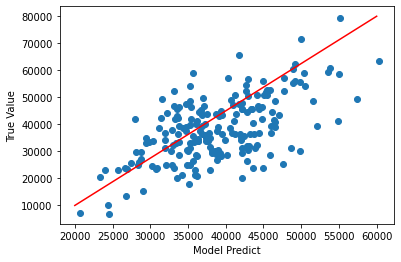

<IPython.core.display.Javascript object>

In [89]:
plt.scatter(x=yhat_test, y=y_test)
plt.xlabel("Model Predict")
plt.plot([20000, 60000], [10000, 80000], "r-")
plt.ylabel("True Value")
plt.show()

## Polynominal Regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

<IPython.core.display.Javascript object>

In [15]:
# bước 2: chuẩn bị tập X và y
X = df[["median_income"]]
y = df.revenue

<IPython.core.display.Javascript object>

In [18]:
pf = PolynomialFeatures(degree=2)

<IPython.core.display.Javascript object>